# Kevin Hagler
5/10/2023


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings('ignore') 

#Predicting Stock Prices
This code is designed to compare the preformance of LSTM, GRU, and Deep RNN 

In [ ]:
data = pd.read_csv("/content/sample_data/A.csv")
data = data.dropna()  # Remove missing values
data = data[['Close']]  # Use only the 'Close' column
data = data.values  # Convert to numpy array
data = data.astype('float32')  # Convert to float32

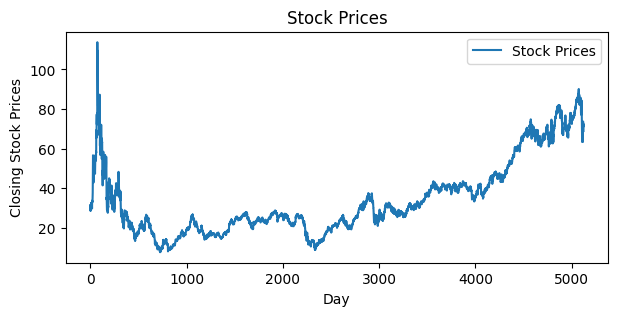

In [ ]:
plt.figure(figsize=(7,3),frameon=False)
plt.title('Stock Prices')
plt.xlabel('Day')
plt.ylabel('Closing Stock Prices')
plt.plot(data, label='Stock Prices')
plt.legend()
plt.show()

In [ ]:
# Spliting the data into 80 and 20
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]



In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 10
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [ ]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))


In [ ]:
max_value = train_data.max()
min_value = train_data.min()
train_data = (train_data - min_value) / (max_value - min_value)
test_data = (test_data - min_value) / (max_value - min_value)

# Long Short-Term Memory (LSTM)

In [ ]:
# Creating the LSTM model
model_LSTM = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(look_back, 1)),
    tf.keras.layers.Dense(1)])


In [ ]:
# Training the model
start = time.time()
model_LSTM.compile(loss='mean_squared_error', optimizer='adam')
model_LSTM.fit(train_X, train_Y, epochs=50, batch_size=1, verbose=2)
end = time.time()
totalTime = end - start
print("Total training time:", totalTime, "seconds")

Epoch 1/50
4088/4088 - 18s - loss: 67.5136 - 18s/epoch - 4ms/step
Epoch 2/50
4088/4088 - 12s - loss: 8.8432 - 12s/epoch - 3ms/step
Epoch 3/50
4088/4088 - 12s - loss: 4.6986 - 12s/epoch - 3ms/step
Epoch 4/50
4088/4088 - 13s - loss: 2.9190 - 13s/epoch - 3ms/step
Epoch 5/50
4088/4088 - 12s - loss: 2.7894 - 12s/epoch - 3ms/step
Epoch 6/50
4088/4088 - 12s - loss: 2.8489 - 12s/epoch - 3ms/step
Epoch 7/50
4088/4088 - 12s - loss: 2.3631 - 12s/epoch - 3ms/step
Epoch 8/50
4088/4088 - 12s - loss: 2.2429 - 12s/epoch - 3ms/step
Epoch 9/50
4088/4088 - 12s - loss: 2.2524 - 12s/epoch - 3ms/step
Epoch 10/50
4088/4088 - 12s - loss: 2.1171 - 12s/epoch - 3ms/step
Epoch 11/50
4088/4088 - 12s - loss: 2.1299 - 12s/epoch - 3ms/step
Epoch 12/50
4088/4088 - 12s - loss: 2.2208 - 12s/epoch - 3ms/step
Epoch 13/50
4088/4088 - 12s - loss: 2.0121 - 12s/epoch - 3ms/step
Epoch 14/50
4088/4088 - 12s - loss: 1.8962 - 12s/epoch - 3ms/step
Epoch 15/50
4088/4088 - 12s - loss: 2.0186 - 12s/epoch - 3ms/step
Epoch 16/50
4088/4

In [ ]:
train_score_LSTM = model_LSTM.evaluate(train_X, train_Y, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score_LSTM, np.sqrt(train_score_LSTM)))
test_score_LSTM = model_LSTM.evaluate(test_X, test_Y, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score_LSTM, np.sqrt(test_score_LSTM)))


Train Score: 1.39 MSE (1.18 RMSE)
Test Score: 2.19 MSE (1.48 RMSE)


In [ ]:
train_predict_LSTM = model_LSTM.predict(train_X)
test_predict_LSTM = model_LSTM.predict(test_X)

32/32 [==============================] - 0s 2ms/step


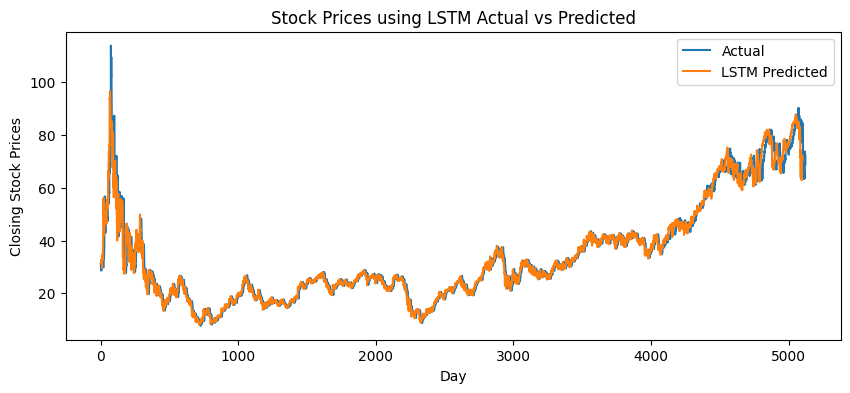

In [ ]:
plt.figure(figsize=(10,4),frameon=False)
plt.title('Stock Prices using LSTM Actual vs Predicted')
plt.xlabel('Day')
plt.ylabel('Closing Stock Prices')
plt.plot(data, label = "Actual")
plt.plot(np.concatenate((train_predict_LSTM, test_predict_LSTM)), label='LSTM Predicted')
plt.legend()
plt.show()

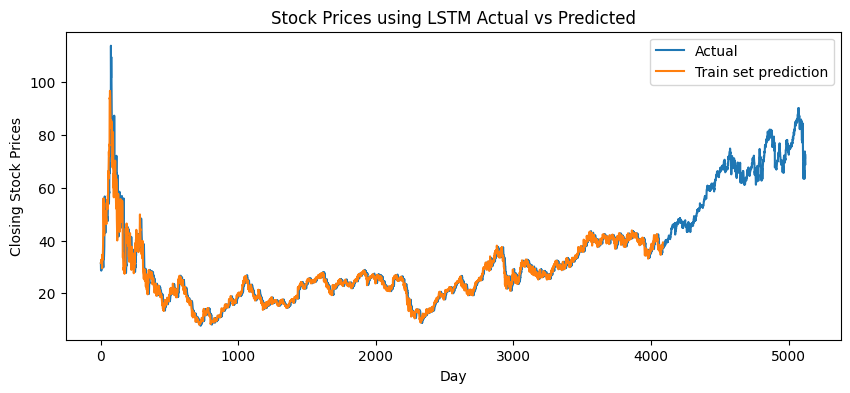

In [ ]:
plt.figure(figsize=(10,4),frameon=False)
plt.title('Stock Prices using LSTM Actual vs Predicted')
plt.xlabel('Day')
plt.ylabel('Closing Stock Prices')
plt.plot(data, label = "Actual")
plt.plot(np.concatenate((train_predict_LSTM)), label='Train set prediction')
plt.legend()
plt.show()

# GRU

In [ ]:
# Getting GRU model
model_GRU = tf.keras.models.Sequential([
    tf.keras.layers.GRU(50, input_shape=(look_back, 1)),
    tf.keras.layers.Dense(1)])

In [ ]:
#Training the model
start = time.time()
model_GRU.compile(loss='mean_squared_error', optimizer='adam')
model_GRU.fit(train_X, train_Y, epochs=50, batch_size=1, verbose=2)
end = time.time()
totalTime = end - start
print("Total training time:", totalTime, "seconds")

Epoch 1/50
4088/4088 - 14s - loss: 71.1369 - 14s/epoch - 3ms/step
Epoch 2/50
4088/4088 - 12s - loss: 8.7188 - 12s/epoch - 3ms/step
Epoch 3/50
4088/4088 - 12s - loss: 4.2448 - 12s/epoch - 3ms/step
Epoch 4/50
4088/4088 - 12s - loss: 2.9192 - 12s/epoch - 3ms/step
Epoch 5/50
4088/4088 - 12s - loss: 2.4421 - 12s/epoch - 3ms/step
Epoch 6/50
4088/4088 - 12s - loss: 2.2831 - 12s/epoch - 3ms/step
Epoch 7/50
4088/4088 - 12s - loss: 2.3293 - 12s/epoch - 3ms/step
Epoch 8/50
4088/4088 - 12s - loss: 2.4163 - 12s/epoch - 3ms/step
Epoch 9/50
4088/4088 - 12s - loss: 2.4057 - 12s/epoch - 3ms/step
Epoch 10/50
4088/4088 - 12s - loss: 2.0403 - 12s/epoch - 3ms/step
Epoch 11/50
4088/4088 - 12s - loss: 2.0760 - 12s/epoch - 3ms/step
Epoch 12/50
4088/4088 - 12s - loss: 2.2019 - 12s/epoch - 3ms/step
Epoch 13/50
4088/4088 - 12s - loss: 1.9653 - 12s/epoch - 3ms/step
Epoch 14/50
4088/4088 - 12s - loss: 2.0837 - 12s/epoch - 3ms/step
Epoch 15/50
4088/4088 - 12s - loss: 2.0304 - 12s/epoch - 3ms/step
Epoch 16/50
4088/4

In [ ]:
train_score_GRU = model_GRU.evaluate(train_X, train_Y, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score_GRU, np.sqrt(train_score_GRU)))
test_score_GRU = model_GRU.evaluate(test_X, test_Y, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score_GRU, np.sqrt(test_score_GRU)))

Train Score: 1.74 MSE (1.32 RMSE)
Test Score: 5.25 MSE (2.29 RMSE)


In [ ]:
train_predict_GRU = model_GRU.predict(train_X)
test_predict_GRU = model_GRU.predict(test_X)

32/32 [==============================] - 0s 2ms/step


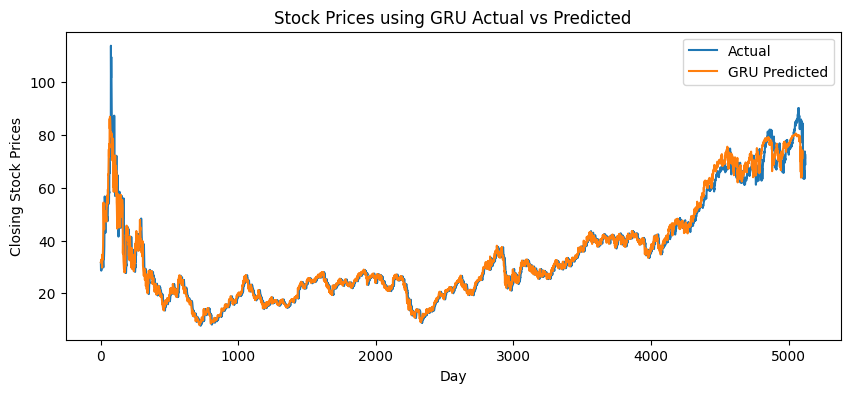

In [ ]:
plt.figure(figsize=(10,4),frameon=False)
plt.title('Stock Prices using GRU Actual vs Predicted')
plt.xlabel('Day')
plt.ylabel('Closing Stock Prices')
plt.plot(data, label = "Actual")
plt.plot(np.concatenate((train_predict_GRU, test_predict_GRU)), label='GRU Predicted')
plt.legend()
plt.show()

# Comparison of LSTM, GRU, and Actual

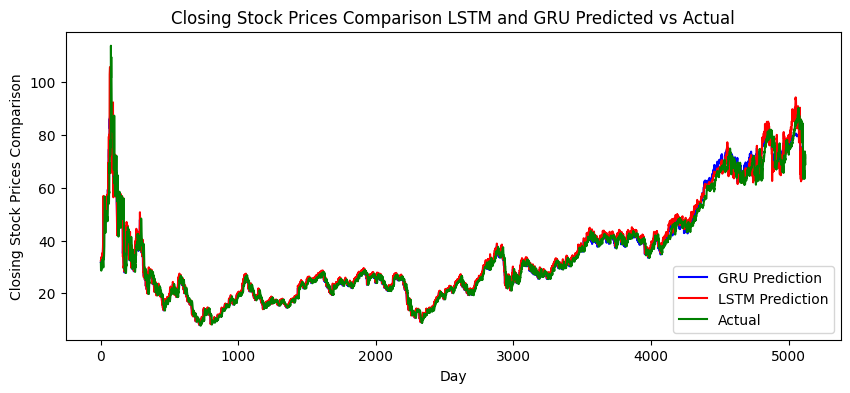

In [ ]:
plt.figure(figsize=(10,4),frameon=False)
plt.title('Closing Stock Prices Comparison LSTM and GRU Predicted vs Actual')
plt.xlabel('Day')
plt.ylabel('Closing Stock Prices Comparison')
plt.plot(np.concatenate((train_predict_GRU, test_predict_GRU)), label='GRU Prediction', color = "blue")
plt.plot(np.concatenate((train_predict_LSTM, test_predict_LSTM)), label='LSTM Prediction', color = "red")
plt.plot(data, label = "Actual", color = "green")
plt.legend()
plt.show()

# Deep RNN

In [ ]:
# Build the Deep RNN model
model_DRNN = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(units=50, return_sequences=True, input_shape=(look_back, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(units=50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)])


In [ ]:
start = time.time()
model_DRNN.compile(loss='mean_squared_error', optimizer='adam')
model_DRNN.fit(train_X, train_Y, epochs=50, batch_size=2, verbose=2)
totalTime = end - start
print("Total training time:", totalTime, "seconds")

Epoch 1/50
2044/2044 - 31s - loss: 26.9584 - 31s/epoch - 15ms/step
Epoch 2/50
2044/2044 - 27s - loss: 26.2228 - 27s/epoch - 13ms/step
Epoch 3/50
2044/2044 - 27s - loss: 24.5829 - 27s/epoch - 13ms/step
Epoch 4/50
2044/2044 - 27s - loss: 25.3510 - 27s/epoch - 13ms/step
Epoch 5/50
2044/2044 - 27s - loss: 24.9294 - 27s/epoch - 13ms/step
Epoch 6/50
2044/2044 - 28s - loss: 25.0510 - 28s/epoch - 14ms/step
Epoch 7/50
2044/2044 - 28s - loss: 24.5498 - 28s/epoch - 13ms/step
Epoch 8/50
2044/2044 - 27s - loss: 25.1170 - 27s/epoch - 13ms/step
Epoch 9/50
2044/2044 - 29s - loss: 23.8783 - 29s/epoch - 14ms/step
Epoch 10/50
2044/2044 - 29s - loss: 24.3716 - 29s/epoch - 14ms/step
Epoch 11/50
2044/2044 - 28s - loss: 24.2058 - 28s/epoch - 14ms/step
Epoch 12/50
2044/2044 - 27s - loss: 23.4365 - 27s/epoch - 13ms/step
Epoch 13/50
2044/2044 - 27s - loss: 23.8256 - 27s/epoch - 13ms/step
Epoch 14/50
2044/2044 - 27s - loss: 23.2516 - 27s/epoch - 13ms/step
Epoch 15/50
2044/2044 - 26s - loss: 23.0164 - 26s/epoch -

In [ ]:
# Evaluate the model
train_predict_DRNN = model_DRNN.predict(train_X)
test_predict_DRNN = model_DRNN.predict(test_X)

32/32 [==============================] - 0s 4ms/step


In [ ]:
train_score_DRNN = model_DRNN.evaluate(train_X, train_Y, verbose=2)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score_DRNN, np.sqrt(train_score_DRNN)))
test_score_DRNN = model_DRNN.evaluate(test_X, test_Y, verbose=2)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score_DRNN, np.sqrt(test_score_DRNN)))

128/128 - 1s - loss: 7.0971 - 769ms/epoch - 6ms/step
Train Score: 7.10 MSE (2.66 RMSE)
32/32 - 0s - loss: 79.2106 - 125ms/epoch - 4ms/step
Test Score: 79.21 MSE (8.90 RMSE)


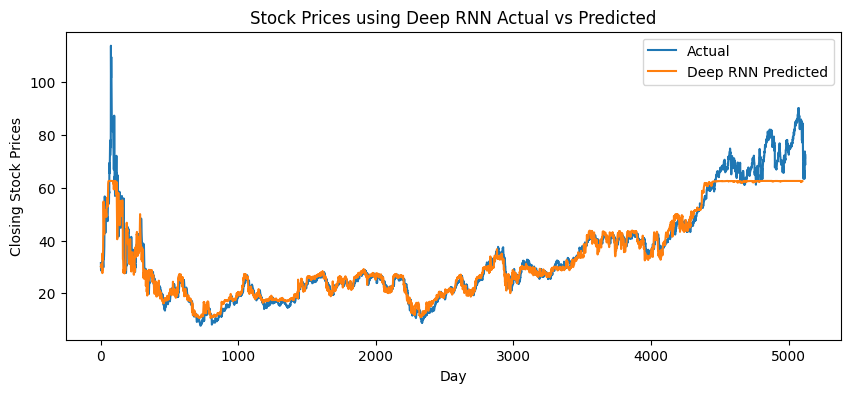

In [ ]:
plt.figure(figsize=(10,4), frameon=False)
plt.title('Stock Prices using Deep RNN Actual vs Predicted')
plt.xlabel('Day')
plt.ylabel('Closing Stock Prices')
plt.plot(data, label = "Actual")
plt.plot(np.concatenate((train_predict_DRNN, test_predict_DRNN)), label='Deep RNN Predicted')
plt.legend()
plt.show()